In [79]:
import numpy as np
import numpy.linalg as nla
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [80]:
x = np.arange(-2, 2, .01)
hz = np.random.normal(0, 3, x.shape)

In [81]:
slower = 3
dftm = np.fft.fft(np.eye(slower*x.size))

In [82]:
dftm = dftm[:, :x.size]

In [83]:
# y = np.where((x < np.pi) & (x > -np.pi), 10*np.sin(x)+np.sin(8*x)+np.sin(50*x), 0)
# y = np.where((x < np.pi) & (x > -np.pi), 10*np.sin(x)+np.sin(8*x), 0)
# y = np.where((x < np.pi) & (x > -np.pi), 10*np.sin(x), 0)+hz
y = 10*np.sin(2*np.pi*x) + 5*np.cos(2*np.pi*x*5)
# y = np.where((x < np.pi) & (x > -np.pi), 1, -1)
# y = 10*np.sin(x)+np.sin(8*x)+np.sin(50*x)
# y = np.where((x < np.pi) & (x > -np.pi), 10*np.sin(50*x), 0)
# y = np.zeros(x.shape)

Y = np.outer(np.ones(dftm.shape[0]), y)

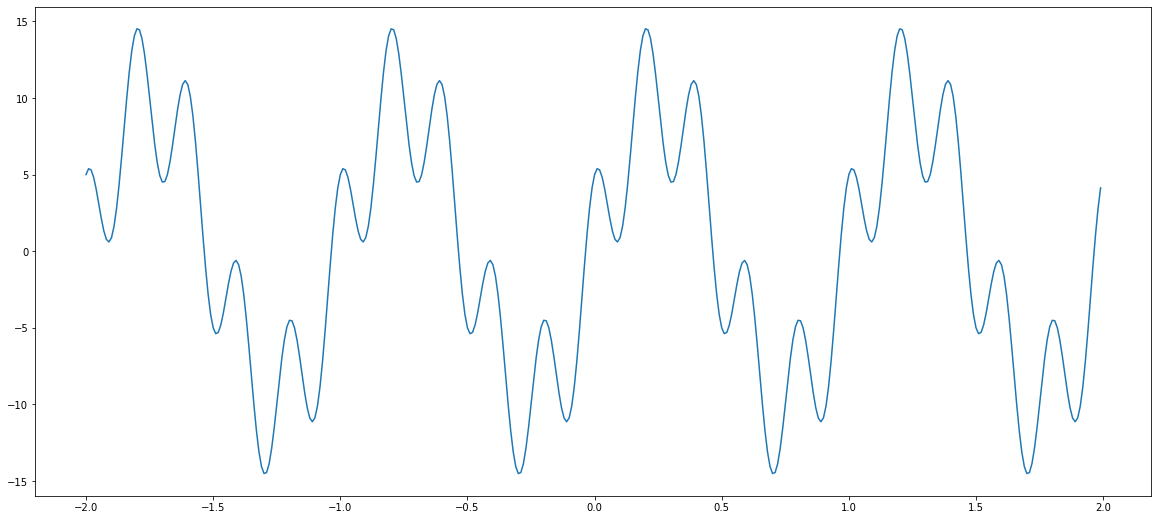

In [84]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(20, 9))
axs.plot(x, y)

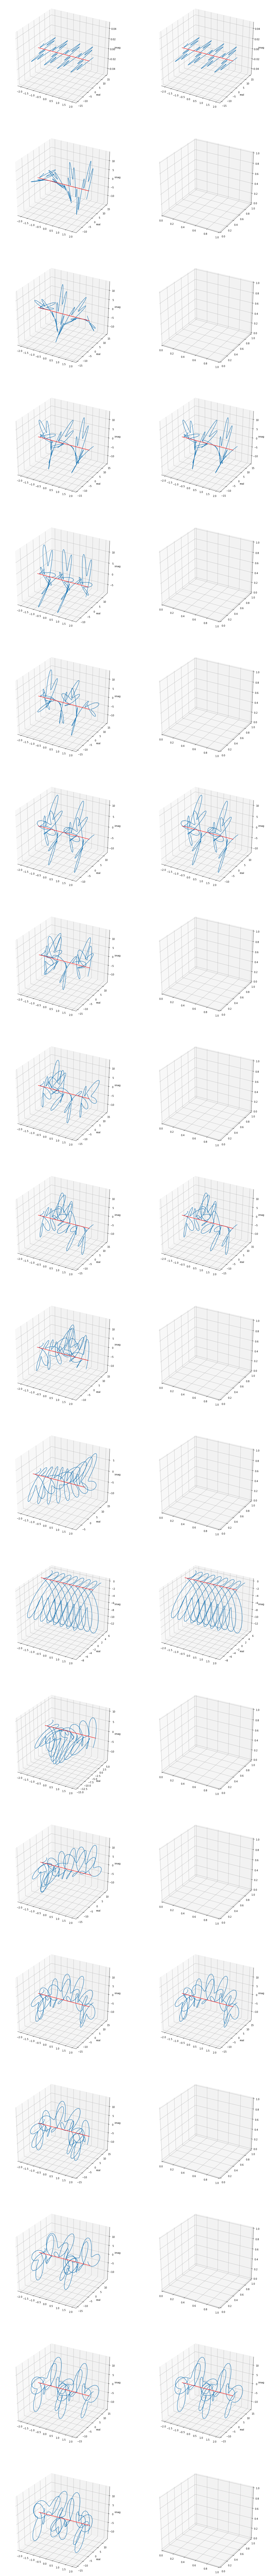

In [85]:
dY = dftm * Y
fig, axs = plt.subplots(nrows=20, ncols=2, figsize=(20, 200), subplot_kw={'projection':'3d'})
for i in range(20):
    axs[i,0].plot(x, np.real(dY[i+0]), np.imag(dY[i+0]), '-')
    axs[i,0].plot([x[0], x[-1]], [0, 0], [0, 0], '-r')
    axs[i,0].set_ylabel('real')
    axs[i,0].set_zlabel('imag')
    if i % slower == 0:
        axs[i,1].plot(x, np.real(dY[i+0]), np.imag(dY[i+0]), '-')
        axs[i,1].plot([x[0], x[-1]], [0, 0], [0, 0], '-r')
        axs[i,1].set_ylabel('real')
        axs[i,1].set_zlabel('imag')

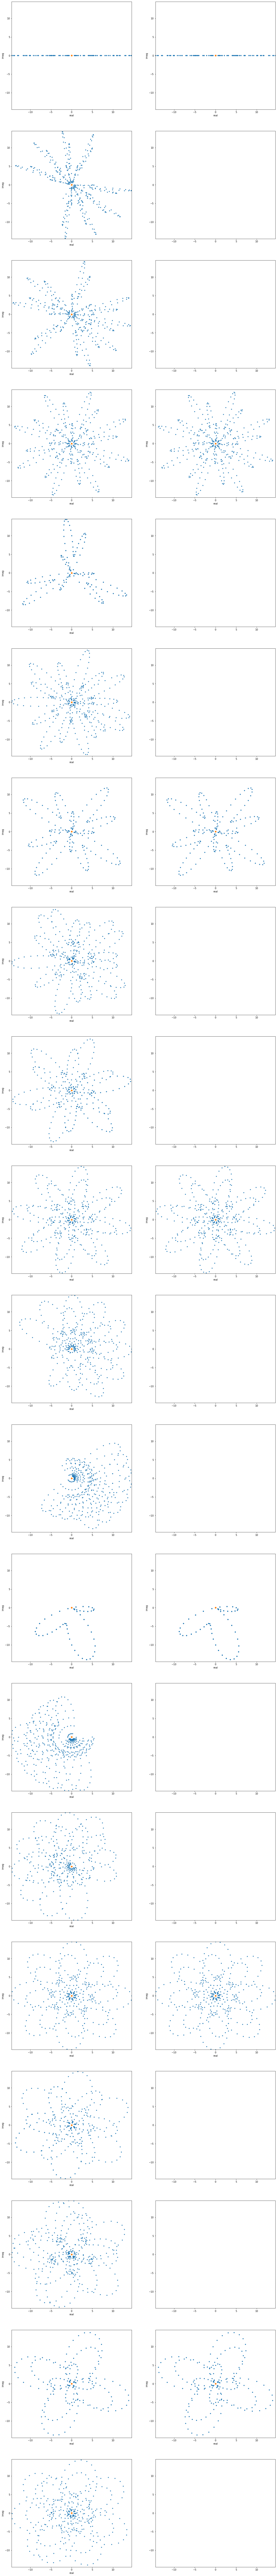

In [86]:
dY = dftm * Y
fig, axs = plt.subplots(nrows=20, ncols=2, figsize=(20, 200))
for i in range(20):
    axs[i,0].plot(np.real(dY[i+0]), np.imag(dY[i+0]), '.')
    axs[i,0].plot([0], [0], 'o')
    axs[i,0].set_xlabel('real')
    axs[i,0].set_ylabel('imag')
    axs[i,0].set_xlim([-np.abs(y).max(), np.abs(y).max()])
    axs[i,0].set_ylim([-np.abs(y).max(), np.abs(y).max()])
    axs[i,1].set_xlim([-np.abs(y).max(), np.abs(y).max()])
    axs[i,1].set_ylim([-np.abs(y).max(), np.abs(y).max()])
    if i % slower == 0:
        axs[i,1].plot(np.real(dY[i+0]), np.imag(dY[i+0]), '.')
        axs[i,1].plot([0], [0], 'o')
        axs[i,1].set_xlabel('real')
        axs[i,1].set_ylabel('imag')

In [87]:
Ty = np.fft.fft(y)

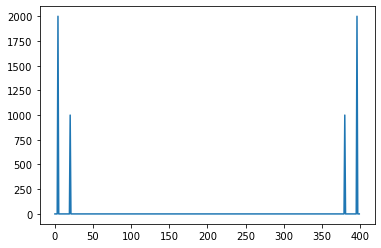

In [88]:
plt.plot(np.abs(Ty))

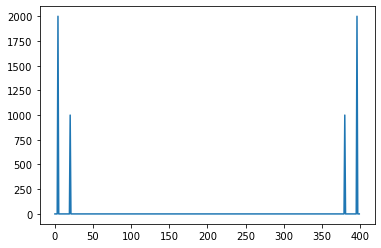

In [89]:
TTy = np.where(np.abs(Ty) > 500, Ty, 0)
plt.plot(np.abs(TTy))

In [90]:
iy = np.fft.ifft(TTy)

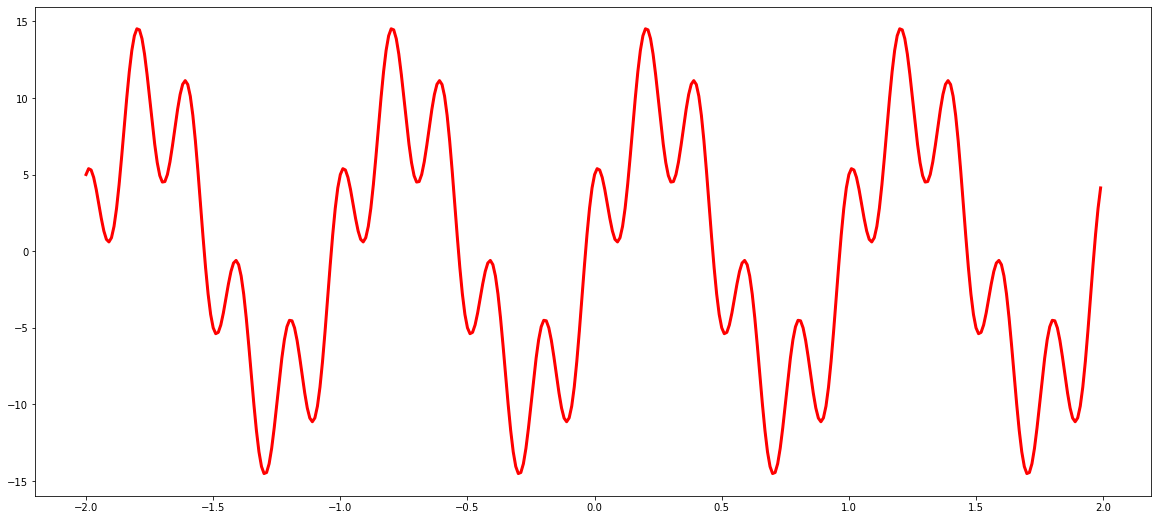

In [91]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(20, 9))
axs.plot(x, y)
axs.plot(x, np.real(iy), 'r-', linewidth = 3)